In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [ ]:
target=[]
images=[]
flat_data=[]

#Loading the Dataset

DATADIR='/content/drive/MyDrive/Image Classification'
CATEGORIES=['jeans','Sarees','Trousers']

In [ ]:
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)                    #Label Encoding
  path=os.path.join(DATADIR,category)                     #creat path to use all images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))            #Resizing the image
    flat_data.append(img_resized.flatten())              #Flatten the img
    images.append(img_resized)
    target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

<BarContainer object of 3 artists>

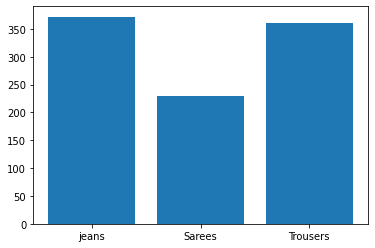

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
#splitting data into Train and Test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=100)

In [ ]:
#Using SVM algorithum with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
#Predicting the model
y_pred=clf.predict(x_test)
y_pred

array([2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2,
       1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2,
       1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0,
       2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 2,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       2, 0, 0])

In [ ]:
y_test

array([2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2,
       1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0,
       0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2,
       1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0,
       2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 2,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       2, 0, 0])

In [ ]:
#Checking Accuracy of the model
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.986159169550173

In [ ]:
#Confusion Matrix
confusion_matrix(y_pred,y_test)

array([[119,   1,   0],
       [  0,  69,   0],
       [  2,   1,  97]])

In [ ]:
#Saving the model
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
#Loading the model
import pickle
model=pickle.load(open('img_model.p','rb'))

Enter your urlhttps://assetscdn1.paytm.com/images/catalog/product/A/AP/APPURBANO-FASHIIMPE166717677C770E/1594960706839_0..jpg
(1460, 1100, 3)
PREDICTED OUTPUT: jeans


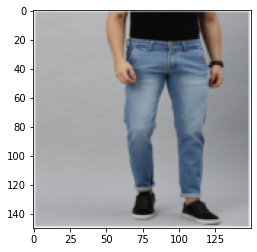

In [24]:
#Testing the model
flat_data=[]
url=input('Enter your url')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')